Tempo de execução com CuPy: 0.9056 segundos
O valor do fator de multiplicação convergido é 1.0975609756097562


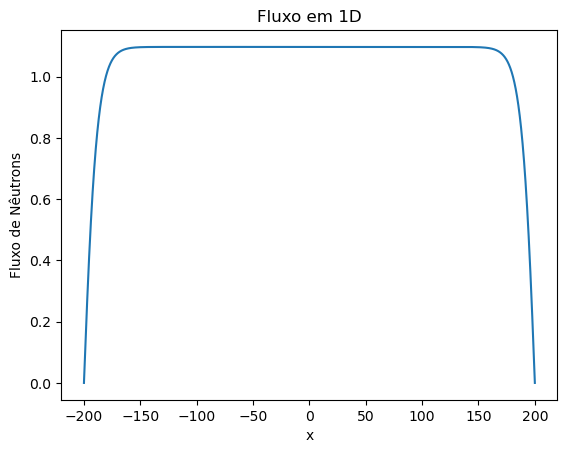

In [8]:
#########################################################
###   TESTE COM EDN 1D e 1G por DF com CUPY somente   ###
#########################################################

import cupy as cp
import matplotlib.pyplot as plt
import time

# Parâmetros
D = 1.320
Sigma_a = 0.041
nu_Sigma_f = 0.045
k_eff = 1.0

# Malha
N = 4000
L = 400.0

# Inicia o tempo de cálculo
start_time_cp = time.time()

dx = L / N
x = cp.linspace(-L/2, L/2, N+1)

# Matriz A e vetor b
A = cp.zeros((N-1, N-1))
b = cp.zeros(N-1)

for i in range(N-1):
    # Coeficiente na diagonal principal
    A[i, i] = 2 * D / dx**2 + Sigma_a

    # Coeficientes nas diagonais secundárias
    if i > 0:
        A[i, i-1] = -D / dx**2
    if i < N-2:
        A[i, i+1] = -D / dx**2

    # Termo fonte
    b[i] = nu_Sigma_f / k_eff

# Iterar até a convergência do k_eff
k_eff_old = k_eff
phi = cp.zeros(N+1)

while True:
    # Resolver o sistema linear
    phi[1:-1] = cp.linalg.solve(A, b)

    # Calcular o novo k_eff
    k_eff_new = nu_Sigma_f * cp.sum(phi[1:-1]) * dx / (k_eff * cp.sum(Sigma_a * phi[1:-1]) * dx)

    # Verificar a convergência
    if abs(k_eff_new - k_eff_old) < 1e-6:
        break
    else:
        k_eff_old = k_eff_new
        b = nu_Sigma_f / k_eff_new * phi[1:-1]

end_time_cp = time.time()

# Calcule os tempos de execução
time_cp = end_time_cp - start_time_cp
print(f"Tempo de execução com CuPy: {time_cp:.4f} segundos")

# Plotar o gráfico do fluxo
plt.plot(x.get(), phi.get())  # Convert CuPy arrays to NumPy arrays using .get()
plt.xlabel('x')
plt.ylabel('Fluxo de Nêutrons')
plt.title('Fluxo em 1D')

# Imprimir o valor do k_eff
print(f"O valor do fator de multiplicação convergido é {k_eff_new}")

plt.show()